# K_Means Clustering Project

Customer Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
mydata = pd.read_excel("cust_data.xlsx")

In [3]:
mydata.head()

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...   0     0       0               0   
1                       0         0  ...   0     1       0               0   
2                       0         0  ...   0     0       0               0   
3                       0         0  ...   0     0       0               0   
4                       0         0  ...   0     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0          0           0         0          0          0      0  
1          0           0         0          0          0      0  
2          0           0         0          1          0      0  
3          0           0         0          0          0      0  
4          0           0         0          0          1      1  

[5 rows x 38 columns]

# Deriving Information of the dataset

In [4]:
mydata.shape

(30000, 38)

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [6]:
mydata.describe()

Cust_ID        Orders        Jordan      Gatorade       Samsung  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000      4.169800      0.267433      0.252333      0.222933   
std     8660.398374      3.590311      0.804778      0.705368      0.917494   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7500.750000      1.000000      0.000000      0.000000      0.000000   
50%    15000.500000      4.000000      0.000000      0.000000      0.000000   
75%    22500.250000      7.000000      0.000000      0.000000      0.000000   
max    30000.000000     12.000000     24.000000     15.000000     27.000000   

               Asus          Udis  Mondelez International      Wrangler  \
count  30000.000000  30000.000000            30000.000000  30000.000000   
mean       0.161333      0.143533                0.139767      0.106933   
std        0.740038      0.641258                0.525840      0.515921   
min        0.000000      0.000000                0.000000      0.000000   
25%        0.000000      0.000000                0.000000      0.000000   
50%        0.000000      0.000000                0.000000      0.000000   
75%        0.000000      0.000000                0.000000      0.000000   
max       17.000000     14.000000               31.000000      9.000000   

               Vans  ...            LG          Dior        Scabal  \
count  30000.000000  ...  30000.000000  30000.000000  30000.000000   
mean       0.111433  ...      0.102533      0.271133      0.370067   
std        0.547990  ...      0.486376      0.714682      0.758465   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      0.000000      1.000000   
max       16.000000  ...     19.000000     12.000000     11.000000   

       Tommy Hilfiger     Hollister    Forever 21      Colavita     Microsoft  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean         0.158967      0.077667      0.057333      0.192200      0.116367   
std          0.510527      0.383370      0.300082      0.641306      0.446578   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000      0.000000   
50%          0.000000      0.000000      0.000000      0.000000      0.000000   
75%          0.000000      0.000000      0.000000      0.000000      0.000000   
max          8.000000      9.000000      8.000000     22.000000     14.000000   

          Jiffy mix         Kraft  
count  30000.000000  30000.000000  
mean       0.088033      0.070900  
std        0.399277      0.387915  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        8.000000     16.000000  

[8 rows x 37 columns]

# Checking For Null Values

In [7]:
mydata.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

# Dropping Null Values

In [8]:
mydata1 = mydata.dropna(inplace=True,axis=0)

In [9]:
mydata.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

# Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
LE = LabelEncoder()

In [12]:
mydata["Gender"]=LE.fit_transform(mydata.Gender)

In [13]:
mydata.head()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
5        6       0       4       0         0        0     0     0   

   Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...   0     0       0               0   
1                       0         0  ...   0     1       0               0   
2                       0         0  ...   0     0       0               0   
3                       0         0  ...   0     0       0               0   
5                       0         0  ...   0     0       1               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0          0           0         0          0          0      0  
1          0           0         0          0          0      0  
2          0           0         0          1          0      0  
3          0           0         0          0          0      0  
5          0           0         0          0          1      0  

[5 rows x 38 columns]

# Correlation

In [14]:
mydata_corr = mydata.corr()

In [15]:
mydata_corr

Cust_ID    Gender    Orders    Jordan  Gatorade  \
Cust_ID                 1.000000 -0.065931  0.022437  0.060953  0.021677   
Gender                 -0.065931  1.000000  0.007767  0.023041  0.125629   
Orders                  0.022437  0.007767  1.000000  0.009460  0.031608   
Jordan                  0.060953  0.023041  0.009460  1.000000  0.176335   
Gatorade                0.021677  0.125629  0.031608  0.176335  1.000000   
Samsung                 0.056866 -0.009161  0.012108  0.070817  0.065919   
Asus                    0.048642 -0.102281  0.012807  0.117573  0.045438   
Udis                    0.060692 -0.083667  0.005052  0.133464  0.056299   
Mondelez International  0.034219 -0.049625  0.004260  0.020776  0.028674   
Wrangler                0.039404 -0.093346 -0.002218  0.041294  0.088092   
Vans                    0.007124  0.144416  0.007256  0.117896  0.174323   
Fila                   -0.001777  0.017860 -0.010092  0.031073  0.028406   
Brooks                  0.039576  0.053839  0.010314  0.164350  0.154862   
H&M                     0.020987 -0.153880  0.025851  0.036819  0.063636   
Dairy Queen            -0.007423 -0.022924 -0.005482  0.039552  0.052831   
Fendi                   0.043401 -0.056224  0.012673  0.029832  0.027520   
Hewlett Packard         0.049913 -0.056423  0.009938  0.012050  0.017016   
Pladis                  0.011292 -0.042699 -0.004832  0.059459  0.061261   
Asics                  -0.000155  0.018021  0.020872  0.008049  0.041740   
Siemens                -0.031921  0.014486  0.013700 -0.008962  0.010355   
J.M. Smucker            0.009507 -0.023209  0.024384  0.056071  0.059220   
Pop Chips               0.045755  0.001090  0.014364  0.080476  0.084174   
Juniper                -0.016996 -0.017156 -0.008106  0.023194  0.028843   
Huawei                  0.017828 -0.032664  0.003286  0.050880  0.041255   
Compaq                 -0.006035  0.016141  0.001113  0.008309  0.006808   
IBM                    -0.024735  0.023858 -0.002839  0.003623 -0.007786   
Burberry                0.060032 -0.109803  0.010218  0.093505  0.099498   
Mi                     -0.036538 -0.078575  0.009168  0.024259  0.032372   
LG                      0.032658 -0.055529 -0.004749  0.072576  0.067319   
Dior                    0.062598 -0.079602  0.006762  0.059792  0.054719   
Scabal                  0.051840 -0.195062  0.015578  0.060782  0.044266   
Tommy Hilfiger          0.021411 -0.072046  0.004811  0.065461  0.057783   
Hollister               0.079315 -0.042999 -0.000457  0.024102  0.053257   
Forever 21              0.048070 -0.050219 -0.003504  0.023718  0.032585   
Colavita                0.003216 -0.000862  0.005378  0.014968  0.019157   
Microsoft              -0.006147 -0.015285  0.012168  0.013014  0.012714   
Jiffy mix              -0.021673 -0.018417  0.009388  0.017802  0.036314   
Kraft                   0.018419 -0.005332 -0.007967  0.019756  0.019086   

                         Samsung      Asus      Udis  Mondelez International  \
Cust_ID                 0.056866  0.048642  0.060692                0.034219   
Gender                 -0.009161 -0.102281 -0.083667               -0.049625   
Orders                  0.012108  0.012807  0.005052                0.004260   
Jordan                  0.070817  0.117573  0.133464                0.020776   
Gatorade                0.065919  0.045438  0.056299                0.028674   
Samsung                 1.000000  0.011594  0.028252                0.033799   
Asus                    0.011594  1.000000  0.115779                0.017059   
Udis                    0.028252  0.115779  1.000000                0.039548   
Mondelez International  0.033799  0.017059  0.039548                1.000000   
Wrangler                0.013512  0.023947  0.022838                0.020544   
Vans                    0.027760  0.047783  0.020103                0.019230   
Fila                    0.023497 -0.003060  0.021702                0.026055   
Brooks              

# Data Visualization

<AxesSubplot:>

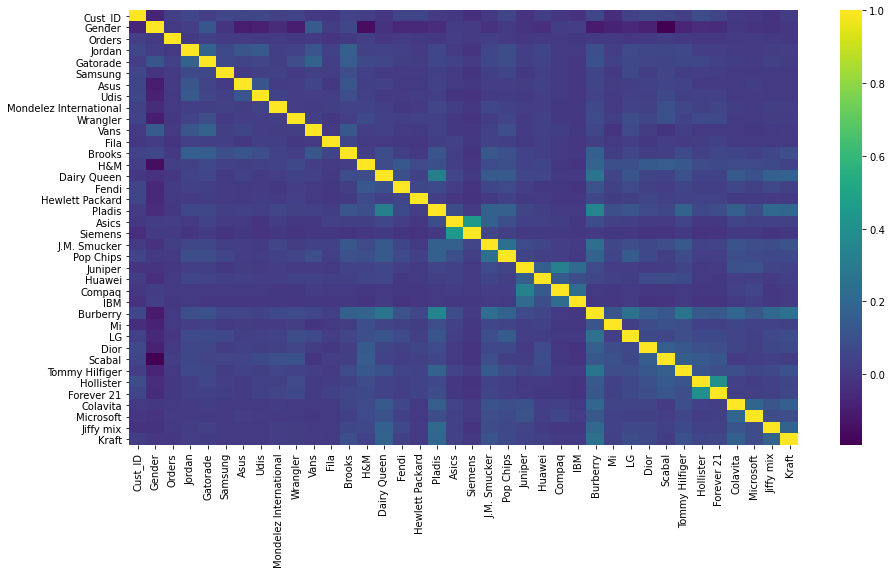

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(data=mydata_corr,annot=False,cmap='viridis')

<AxesSubplot:xlabel='Samsung', ylabel='Burberry'>

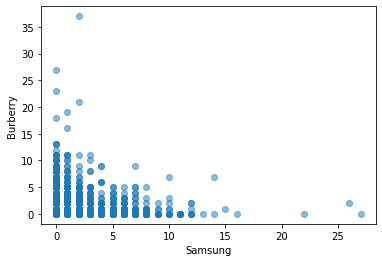

In [17]:
sns.regplot(x = "Samsung", y="Burberry", data=mydata, fit_reg = False, scatter_kws={"alpha": 0.5})

<AxesSubplot:xlabel='Tommy Hilfiger', ylabel='Wrangler'>

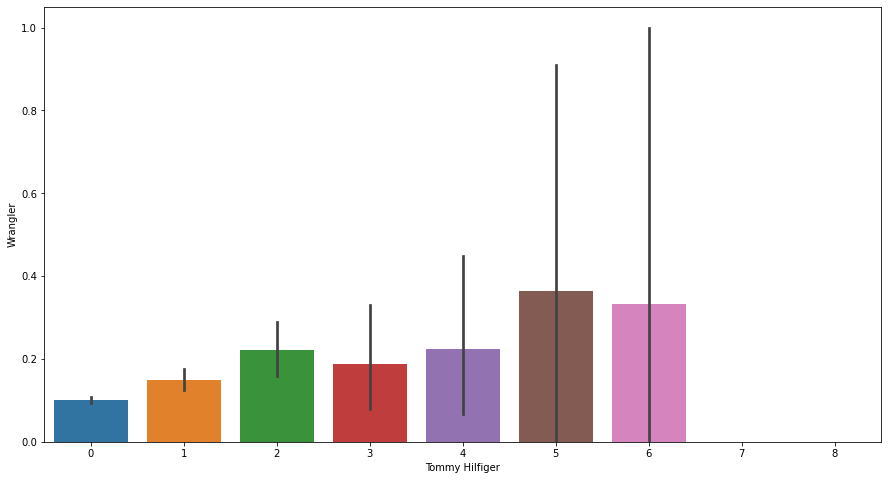

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x='Tommy Hilfiger',y='Wrangler',data=mydata)

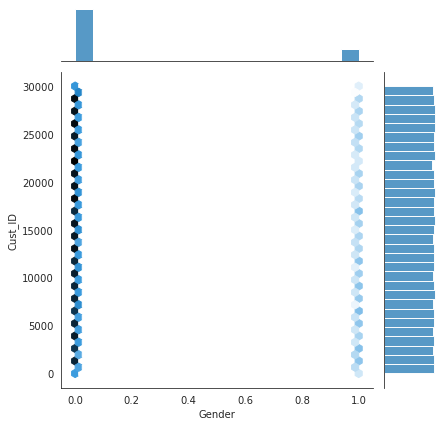

In [19]:
with sns.axes_style('white'):
    sns.jointplot(x="Gender", y="Cust_ID", data=mydata, kind='hex')

<AxesSubplot:xlabel='Orders', ylabel='Gender'>

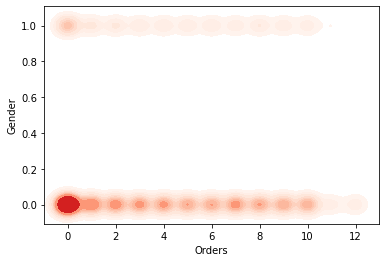

In [20]:
sns.kdeplot(x='Orders', y='Gender',data=mydata, cmap="Reds", shade=True, bw_adjust=.5)

# Cluster

In [21]:
from sklearn.cluster import KMeans

In [22]:
Km_cluster=KMeans(3)

In [23]:
Km_cluster.fit(mydata)

KMeans(n_clusters=3)

In [24]:
my_Cluster=mydata.copy()

In [25]:
my_Cluster['KM_Group']=Km_cluster.predict(my_Cluster)

In [26]:
my_Cluster

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0            1       1       7       0         0        0     0     0   
1            2       0       0       0         1        0     0     0   
2            3       1       7       0         1        0     0     0   
3            4       0       0       0         0        0     0     0   
5            6       0       4       0         0        0     0     0   
...        ...     ...     ...     ...       ...      ...   ...   ...   
29995    29996       1       0       0         0        0     0     0   
29996    29997       1       1       0         1        0     0     0   
29997    29998       1       0       0         1        0     0     0   
29998    29999       1       0       0         0        0     0     0   
29999    30000       0       3       2         0        0     1     0   

       Mondelez International  Wrangler  ...  Dior  Scabal  Tommy Hilfiger  \
0                           0         0  ...     0       0               0   
1                           0         0  ...     1       0               0   
2                           0         0  ...     0       0               0   
3                           0         0  ...     0       0               0   
5                           0         0  ...     0       1               0   
...                       ...       ...  ...   ...     ...             ...   
29995                       0         0  ...     0       0               0   
29996                       0         0  ...     0       0               0   
29997                       0         0  ...     0       0               0   
29998                       0         0  ...     0       0               0   
29999                       0         0  ...     0       0               0   

       Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  KM_Group  
0              0           0         0          0          0      0         2  
1              0           0         0          0          0      0         2  
2              0           0         0          1          0      0         2  
3              0           0         0          0          0      0         2  
5              0           0         0          0          1      0         2  
...          ...         ...       ...        ...        ...    ...       ...  
29995          0           0         0          0          0      0         1  
29996          0           0         0          0          0      0         1  
29997          0           0         0          0          0      0         1  
29998          0           0         0          0          0      0         1  
29999          0           0         0          0          0      0         1  

[27276 rows x 39 columns]

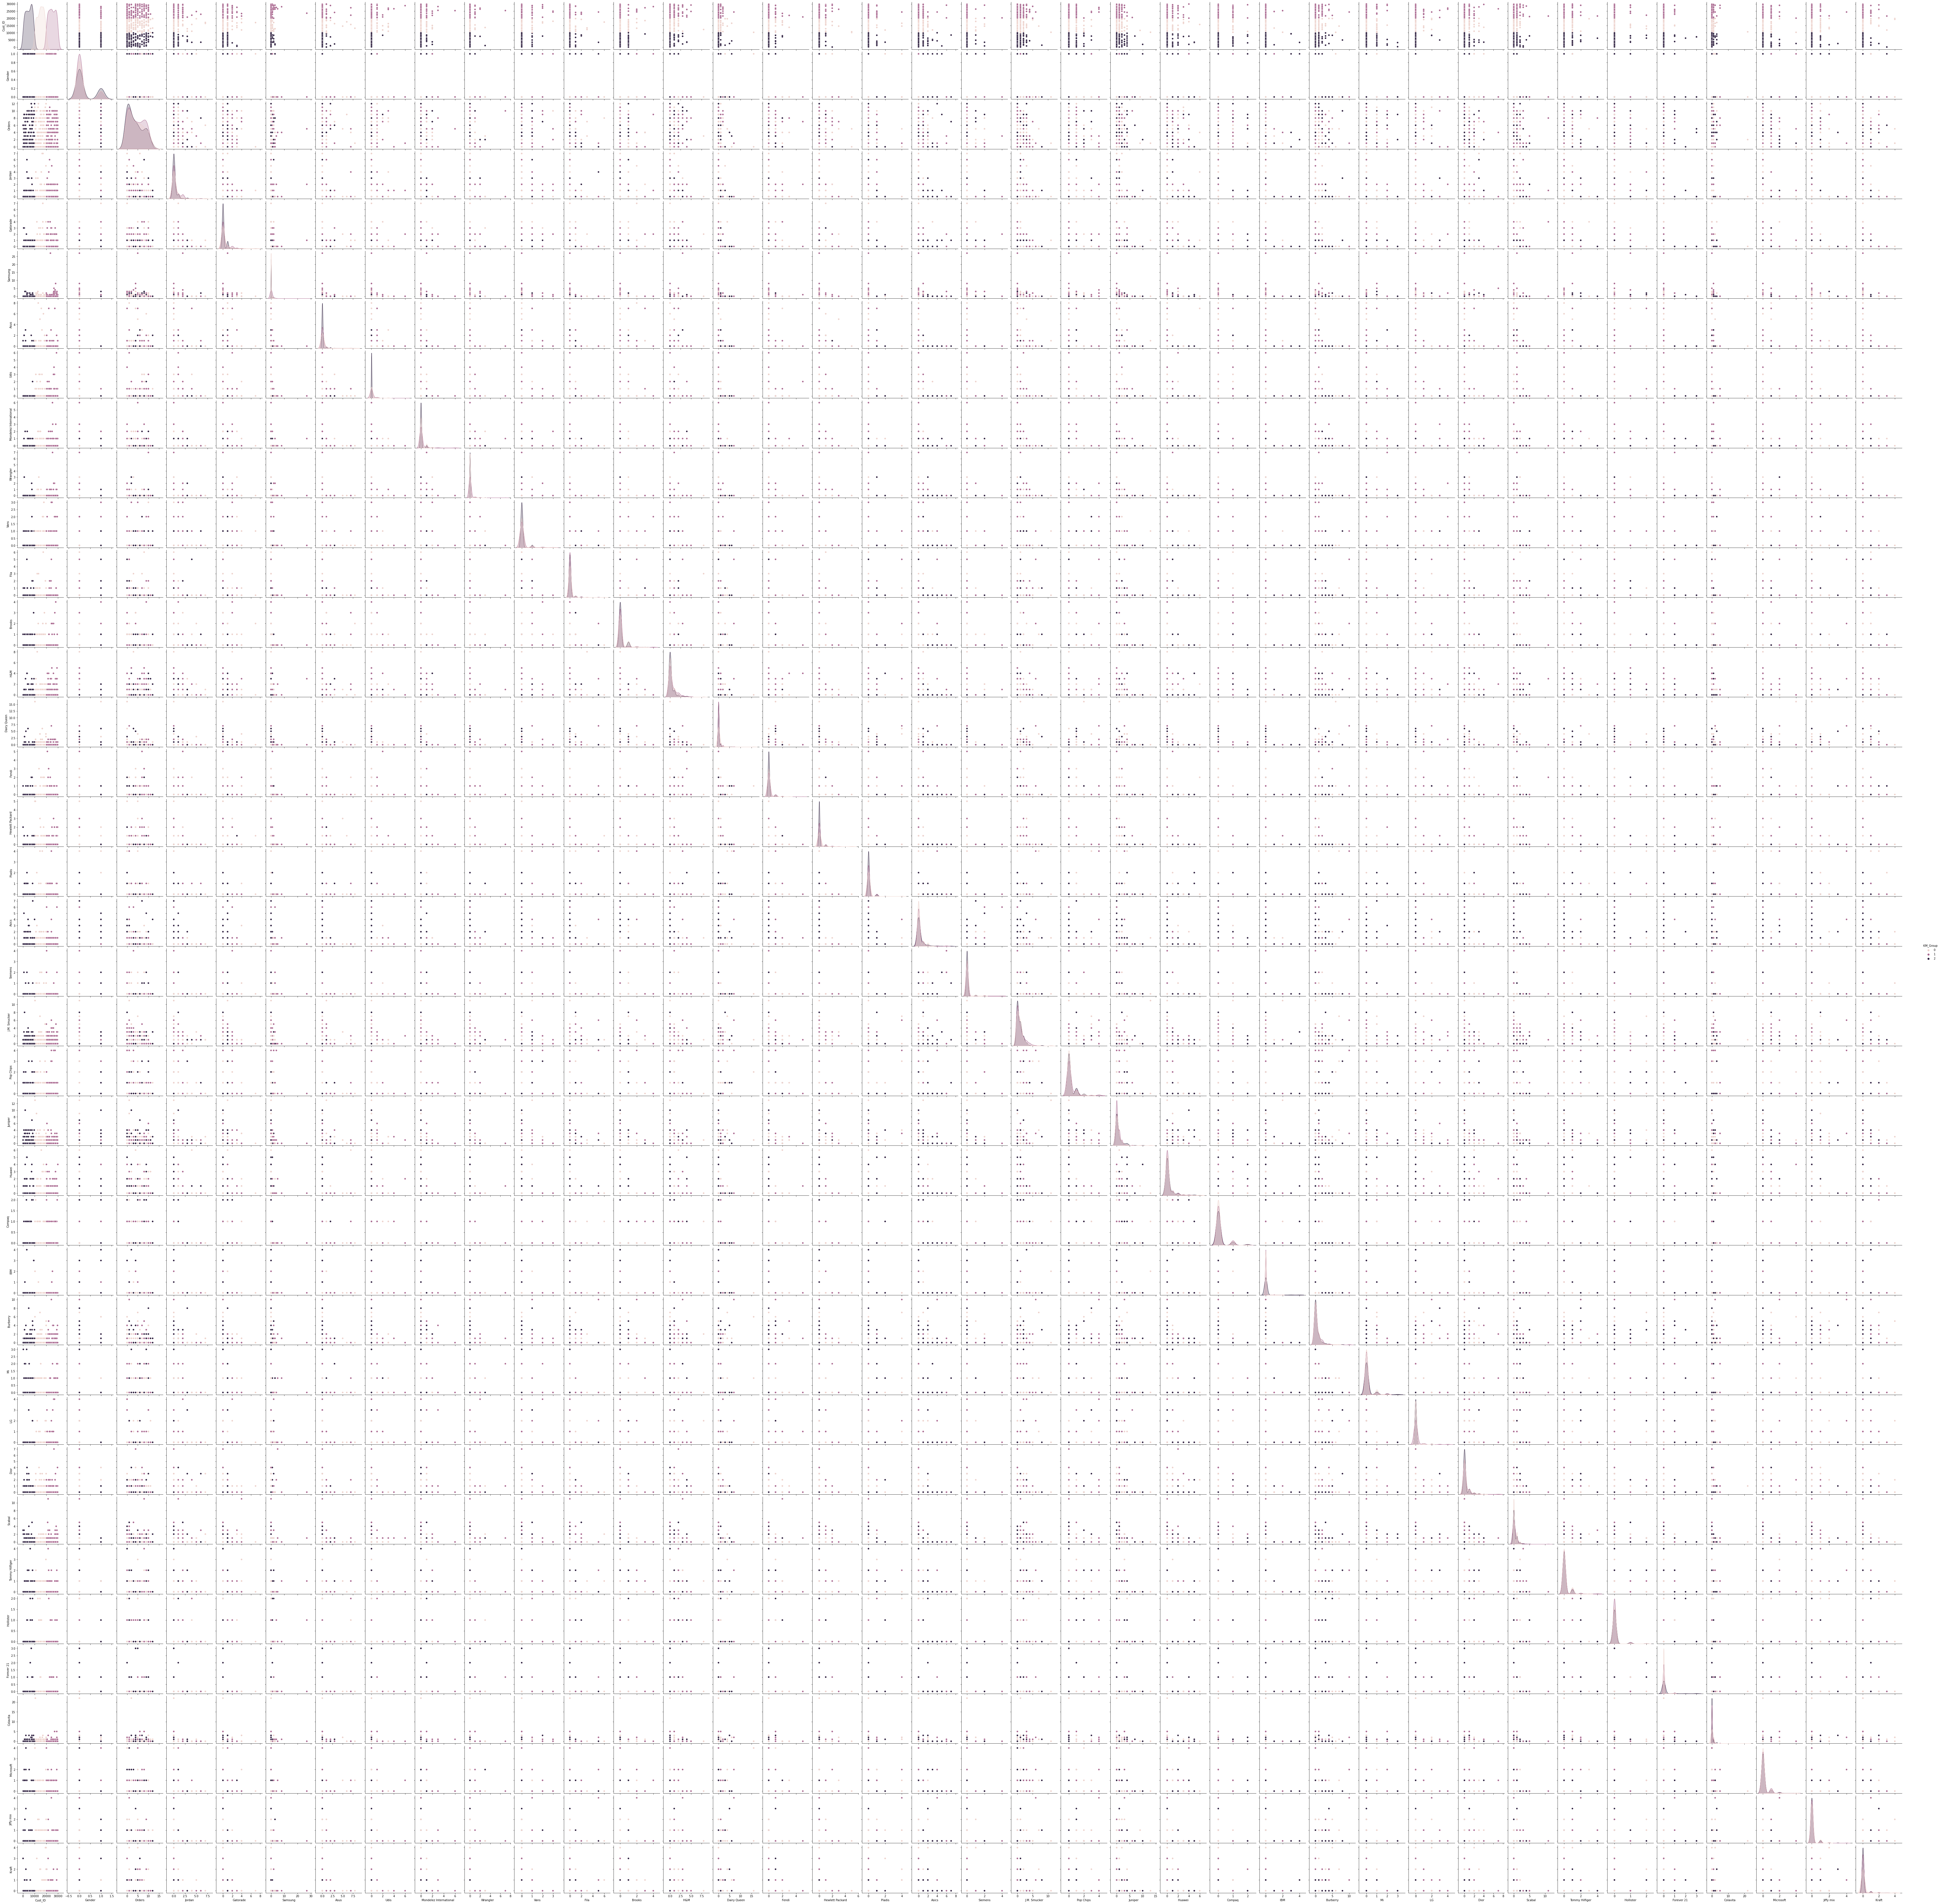

In [27]:
sns.pairplot(data=my_Cluster.sample(500),hue='KM_Group')

# Normalizing 

In [82]:
from sklearn import preprocessing
x_scaled = preprocessing.normalize(mydata)

In [83]:
x_scaled

array([[1.34839972e-01, 1.34839972e-01, 9.43879807e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.42535625e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.69274473e-01, 1.23091491e-01, 8.61640437e-01, ...,
        1.23091491e-01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99999998e-01, 3.33355556e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99999999e-01, 3.33344444e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99999990e-01, 0.00000000e+00, 9.99999990e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

<AxesSubplot:ylabel='Density'>

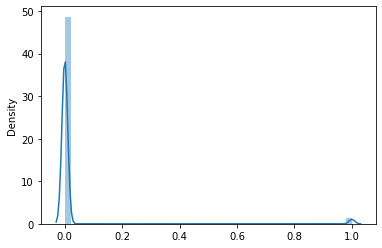

In [84]:
sns.distplot(x_scaled)

# Elbow Method

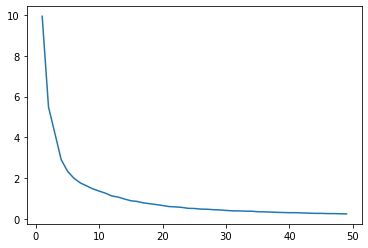

In [85]:
a=[]
for i in range(1,50):
    kmeans_em=KMeans(i)
    kmeans_em.fit(x_scaled)
    a.append(kmeans_em.inertia_)
plt.plot(range(1,50),a)

In [86]:
Km_cluster_em=KMeans(6)

In [87]:
Km_cluster_em.fit(x_scaled)

KMeans(n_clusters=6)

In [88]:
my_Cluster_new=mydata.copy()

In [89]:
my_Cluster_new['KM_Elbow']=Km_cluster_em.predict(x_scaled)

In [90]:
my_Cluster_new

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0            1       1       7       0         0        0     0     0   
1            2       0       0       0         1        0     0     0   
2            3       1       7       0         1        0     0     0   
3            4       0       0       0         0        0     0     0   
5            6       0       4       0         0        0     0     0   
...        ...     ...     ...     ...       ...      ...   ...   ...   
29995    29996       1       0       0         0        0     0     0   
29996    29997       1       1       0         1        0     0     0   
29997    29998       1       0       0         1        0     0     0   
29998    29999       1       0       0         0        0     0     0   
29999    30000       0       3       2         0        0     1     0   

       Mondelez International  Wrangler  ...  Dior  Scabal  Tommy Hilfiger  \
0                           0         0  ...     0       0               0   
1                           0         0  ...     1       0               0   
2                           0         0  ...     0       0               0   
3                           0         0  ...     0       0               0   
5                           0         0  ...     0       1               0   
...                       ...       ...  ...   ...     ...             ...   
29995                       0         0  ...     0       0               0   
29996                       0         0  ...     0       0               0   
29997                       0         0  ...     0       0               0   
29998                       0         0  ...     0       0               0   
29999                       0         0  ...     0       0               0   

       Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  KM_Elbow  
0              0           0         0          0          0      0         4  
1              0           0         0          0          0      0         2  
2              0           0         0          1          0      0         4  
3              0           0         0          0          0      0         0  
5              0           0         0          0          1      0         1  
...          ...         ...       ...        ...        ...    ...       ...  
29995          0           0         0          0          0      0         0  
29996          0           0         0          0          0      0         0  
29997          0           0         0          0          0      0         0  
29998          0           0         0          0          0      0         0  
29999          0           0         0          0          0      0         0  

[27276 rows x 39 columns]

In [91]:
my_Cluster_new.KM_Elbow.unique()

array([4, 2, 0, 1, 3, 5])

# Here we found the optimum number of clusters.


# The number of clusters is 6

# Random Forest

In [92]:
mydata2 = my_Cluster_new

In [93]:
y_dep = mydata2.KM_Elbow

In [94]:
x_ind = mydata2.drop("KM_Elbow",axis=1)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,train_size=0.8,random_state=2)

In [97]:
model_rf1=RandomForestClassifier(random_state=2)

In [98]:
model_rf1=model_rf1.fit(x_train,y_train)

In [99]:
y_pred1=model_rf1.predict(x_test)

In [100]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [102]:
confusion_matrix(y_pred1,y_test)

array([[5448,    0,    1,    0],
       [   0,    0,    0,    0],
       [   0,    1,    5,    1],
       [   0,    0,    0,    0]], dtype=int64)

In [103]:
accuracy_score(y_pred1,y_test)

0.9994501466275659

# Classification Report

In [104]:
from sklearn.metrics import classification_report

In [105]:
c_Report=classification_report(y_test,y_pred1)

In [106]:
print(c_Report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5448
           1       0.00      0.00      0.00         1
           3       0.71      0.83      0.77         6
           5       0.00      0.00      0.00         1

    accuracy                           1.00      5456
   macro avg       0.43      0.46      0.44      5456
weighted avg       1.00      1.00      1.00      5456



# The Accuracy Score of the model using the predicted Clusters that is implemented in Random Forest is 99.9%